In [8]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [9]:

type(data)

dict

In [10]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10975,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.967869e+07,1.967869e+07,False,NaN,1,NaN,NaN,None,2024-04-10T11:47:00.000Z,69029.395862,3.311886e+10,-4.3581,0.288090,-2.373914,4.679011,-4.392356,46.470813,46.880917,1.358408e+12,52.5778,1.449617e+12,None,2024-04-10T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 13:49:24.536372
1,1027,Ethereum,ETH,ethereum,8759,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200702e+08,1.200702e+08,True,NaN,2,NaN,NaN,None,2024-04-10T11:46:00.000Z,3520.308495,1.613830e+10,-13.2273,0.288495,-3.113078,6.365685,-12.989957,41.904566,32.463610,4.226841e+11,16.3518,4.226841e+11,None,2024-04-10T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 13:49:24.536372
2,825,Tether USDt,USDT,tether,82094,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.071893e+11,1.109410e+11,True,NaN,3,NaN,NaN,None,2024-04-10T11:46:00.000Z,1.000204,6.333803e+10,-8.6335,0.018728,0.003925,-0.044908,0.003170,-0.044418,-0.012218,1.072112e+11,4.1475,1.109637e+11,None,2024-04-10T11:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-10 13:49:24.536372
3,1839,BNB,BNB,bnb,2140,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495347e+08,1.495347e+08,False,NaN,4,NaN,NaN,None,2024-04-10T11:46:00.000Z,587.111497,1.902448e+09,-1.8799,-0.038578,0.575924,5.519447,11.891860,83.401012,86.637045,8.779353e+10,3.3985,8.779353e+10,None,2024-04-10T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 13:49:24.536372
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.456866e+08,5.736574e+08,True,NaN,5,NaN,NaN,None,2024-04-10T11:46:00.000Z,170.042508,2.655646e+09,10.8696,0.266414,-3.398998,-9.556004,14.206817,57.454535,63.620218,7.578566e+10,2.9337,9.754614e+10,None,2024-04-10T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 13:49:24.536372
5,52,XRP,XRP,xrp,1293,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,6,NaN,NaN,None,2024-04-10T11:47:00.000Z,0.612629,2.476343e+09,25.3652,0.446977,-0.768722,4.993302,-2.131443,17.624688,0.168473,3.372619e+10,1.3055,6.126292e+10,None,2024-04-10T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 13:49:24.536372
6,3408,USDC,USDC,usd-coin,18056,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.222171e+10,3.222171e+10,False,NaN,7,NaN,NaN,None,2024-04-10T11:46:00.000Z,1.000165,7.020592e+09,-10.0997,0.018312,0.010280,0.005739,0.035166,0.021781,-0.004512,3.222702e+10,1.2475,3.222702e+10,None,2024-04-10T11:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-10 13:49:24.536372
7,74,Dogecoin,DOGE,dogecoin,947,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.438267e+11,1.438267e+11,True,NaN,8,NaN,NaN,None,2024-04-10T11:47:00.000Z,0.188638,1.916527e+09,2.6579,0.893360,-4.029319,2.663153,6.622682,133.640455,121.041045,2.713121e+10,1.0501,2.713121e+10,None,2024-04-10T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 13:49:24.536372
8,11419,Toncoin,TON,toncoin,269,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.470696e+09,5.1

In [18]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

if not os.path.isfile(r'C:\Users\sruno\OneDrive\Desktop\Work\Portforlio\API.csv'):
    df.to_csv(r'C:\Users\sruno\OneDrive\Desktop\Work\Portforlio\API.csv',header='column_names')
else: 
    df.to_csv(r'C:\Users\sruno\OneDrive\Desktop\Work\Portforlio\API.csv',mode='a',header=False)

In [24]:
df20 = pd.read_csv(r'C:\Users\sruno\OneDrive\Desktop\Work\Portforlio\API.csv')
df20

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10975,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19678687.00000,19678687.00000,False,NaN,1,NaN,NaN,NaN,2024-04-10T11:59:00.000Z,69042.60756,33118169737.97172,-4.04490,0.11811,-2.43508,4.48507,-3.52803,46.24657,46.62995,1358667863880.95581,52.59540,1449894758806.83008,NaN,2024-04-10T11:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
1,1,1027,Ethereum,ETH,ethereum,8759,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120070188.26799,120070188.26799,True,NaN,2,NaN,NaN,NaN,2024-04-10T11:58:00.000Z,3520.95345,16132268711.66849,-13.09670,-0.04254,-2.95955,5.95011,-12.71592,41.74117,32.34930,422761543780.88855,16.36930,422761543780.89001,NaN,2024-04-10T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
2,2,825,Tether USDt,USDT,tether,82094,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,107189305522.75916,110941048614.45586,True,NaN,3,NaN,NaN,NaN,2024-04-10T11:58:00.000Z,0.99989,63282107357.25062,-8.44700,-0.00494,-0.00991,-0.07861,-0.09051,-0.07973,-0.05456,107177732974.85889,4.14990,110929071014.70000,NaN,2024-04-10T11:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-10 14:00:26.335521
3,3,1839,BNB,BNB,bnb,2140,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149534682.85925,149534682.85925,False,NaN,4,NaN,NaN,NaN,2024-04-10T11:58:00.000Z,586.41895,1899450353.65536,-2.03510,-0.19930,0.40561,5.21410,12.18092,82.94618,86.45081,87689971956.75752,3.39570,87689971956.75999,NaN,2024-04-10T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
4,4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,445686585.90911,573657410.52394,True,NaN,5,NaN,NaN,NaN,2024-04-10T11:58:00.000Z,170.14889,2658205710.89924,11.28440,0.18385,-3.40228,-9.63030,14.63155,57.25767,62.82760,75833078615.75537,2.93660,97607172587.52000,NaN,2024-04-10T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
5,5,52,XRP,XRP,xrp,1293,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,6,NaN,NaN,NaN,2024-04-10T11:59:00.000Z,0.61230,2439590776.21043,20.19070,-0.14601,-1.97058,4.87899,-1.79829,17.47856,-0.04487,33707946203.94058,1.30530,61229786496.20000,NaN,2024-04-10T11:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
6,6,3408,USDC,USDC,usd-coin,18056,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32221711340.60084,32221711340.60084,False,NaN,7,NaN,NaN,NaN,2024-04-10T11:58:00.000Z,0.99989,7020165360.94742,-9.67330,-0.01458,-0.01320,-0.02648,-0.02305,-0.00343,-0.03157,32218299279.81319,1.24760,32218299279.81000,NaN,2024-04-10T11:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-10 14:00:26.335521
7,7,74,Dogecoin,DOGE,dogecoin,947,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,143826736383.70523,143826736383.70520,True,NaN,8,NaN,NaN,NaN,2024-04-10T11:59:00.000Z,0.18844,1915599079.28208,2.78670,0.22512,-4.18036,2.62980,7.38856,133.16084,119.14189,27103371984.30049,1.04920,27103371984.30000,NaN,2024-04-10T11:5

In [15]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) 
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10975,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.967869e+07,1.967869e+07,False,NaN,1,NaN,NaN,None,2024-04-10T11:59:00.000Z,69042.607562,3.311817e+10,-4.0449,0.118107,-2.435081,4.485072,-3.528025,46.246572,46.629950,1.358668e+12,52.5954,1.449895e+12,None,2024-04-10T11:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
1,1027,Ethereum,ETH,ethereum,8759,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200702e+08,1.200702e+08,True,NaN,2,NaN,NaN,None,2024-04-10T11:58:00.000Z,3520.953451,1.613227e+10,-13.0967,-0.042537,-2.959550,5.950107,-12.715916,41.741173,32.349299,4.227615e+11,16.3693,4.227615e+11,None,2024-04-10T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
2,825,Tether USDt,USDT,tether,82094,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.071893e+11,1.109410e+11,True,NaN,3,NaN,NaN,None,2024-04-10T11:58:00.000Z,0.999892,6.328211e+10,-8.4470,-0.004942,-0.009908,-0.078608,-0.090509,-0.079726,-0.054560,1.071777e+11,4.1499,1.109291e+11,None,2024-04-10T11:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-10 14:00:26.335521
3,1839,BNB,BNB,bnb,2140,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495347e+08,1.495347e+08,False,NaN,4,NaN,NaN,None,2024-04-10T11:58:00.000Z,586.418952,1.899450e+09,-2.0351,-0.199304,0.405609,5.214096,12.180922,82.946181,86.450808,8.768997e+10,3.3957,8.768997e+10,None,2024-04-10T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.456866e+08,5.736574e+08,True,NaN,5,NaN,NaN,None,2024-04-10T11:58:00.000Z,170.148892,2.658206e+09,11.2844,0.183849,-3.402277,-9.630301,14.631553,57.257667,62.827599,7.583308e+10,2.9366,9.760717e+10,None,2024-04-10T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
5,52,XRP,XRP,xrp,1293,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,6,NaN,NaN,None,2024-04-10T11:59:00.000Z,0.612298,2.439591e+09,20.1907,-0.146011,-1.970585,4.878995,-1.798292,17.478562,-0.044869,3.370795e+10,1.3053,6.122979e+10,None,2024-04-10T11:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
6,3408,USDC,USDC,usd-coin,18056,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.222171e+10,3.222171e+10,False,NaN,7,NaN,NaN,None,2024-04-10T11:58:00.000Z,0.999894,7.020165e+09,-9.6733,-0.014580,-0.013198,-0.026483,-0.023050,-0.003426,-0.031567,3.221830e+10,1.2476,3.221830e+10,None,2024-04-10T11:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-10 14:00:26.335521
7,74,Dogecoin,DOGE,dogecoin,947,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.438267e+11,1.438267e+11,True,NaN,8,NaN,NaN,None,2024-04-10T11:59:00.000Z,0.188445,1.915599e+09,2.7867,0.225115,-4.180356,2.629802,7.388556,133.160843,119.141887,2.710337e+10,1.0492,2.710337e+10,None,2024-04-10T11:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
8,11419,Toncoin,TON,toncoin,269,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.4706

In [21]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10975,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19678687.00000,19678687.00000,False,NaN,1,NaN,NaN,None,2024-04-10T11:59:00.000Z,69042.60756,33118169737.97171,-4.04490,0.11811,-2.43508,4.48507,-3.52803,46.24657,46.62995,1358667863880.95581,52.59540,1449894758806.83008,None,2024-04-10T11:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
1,1027,Ethereum,ETH,ethereum,8759,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120070188.26799,120070188.26799,True,NaN,2,NaN,NaN,None,2024-04-10T11:58:00.000Z,3520.95345,16132268711.66849,-13.09670,-0.04254,-2.95955,5.95011,-12.71592,41.74117,32.34930,422761543780.88855,16.36930,422761543780.89001,None,2024-04-10T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
2,825,Tether USDt,USDT,tether,82094,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,107189305522.75916,110941048614.45586,True,NaN,3,NaN,NaN,None,2024-04-10T11:58:00.000Z,0.99989,63282107357.25062,-8.44700,-0.00494,-0.00991,-0.07861,-0.09051,-0.07973,-0.05456,107177732974.85887,4.14990,110929071014.70000,None,2024-04-10T11:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-10 14:00:26.335521
3,1839,BNB,BNB,bnb,2140,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149534682.85925,149534682.85925,False,NaN,4,NaN,NaN,None,2024-04-10T11:58:00.000Z,586.41895,1899450353.65536,-2.03510,-0.19930,0.40561,5.21410,12.18092,82.94618,86.45081,87689971956.75752,3.39570,87689971956.75999,None,2024-04-10T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,445686585.90911,573657410.52394,True,NaN,5,NaN,NaN,None,2024-04-10T11:58:00.000Z,170.14889,2658205710.89924,11.28440,0.18385,-3.40228,-9.63030,14.63155,57.25767,62.82760,75833078615.75537,2.93660,97607172587.52000,None,2024-04-10T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
5,52,XRP,XRP,xrp,1293,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,6,NaN,NaN,None,2024-04-10T11:59:00.000Z,0.61230,2439590776.21043,20.19070,-0.14601,-1.97058,4.87899,-1.79829,17.47856,-0.04487,33707946203.94058,1.30530,61229786496.20000,None,2024-04-10T11:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-10 14:00:26.335521
6,3408,USDC,USDC,usd-coin,18056,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32221711340.60084,32221711340.60084,False,NaN,7,NaN,NaN,None,2024-04-10T11:58:00.000Z,0.99989,7020165360.94742,-9.67330,-0.01458,-0.01320,-0.02648,-0.02305,-0.00343,-0.03157,32218299279.81319,1.24760,32218299279.81000,None,2024-04-10T11:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-10 14:00:26.335521
7,74,Dogecoin,DOGE,dogecoin,947,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143826736383.70523,143826736383.70520,True,NaN,8,NaN,NaN,None,2024-04-10T11:59:00.000Z,0.18844,1915599079.28208,2.78670,0.22512,-4.18036,2.62980,7.38856,133.16084,119.14189,27103371984.30049,1.04920,27103371984.30000,None,2024-04-10T11:59:00.000Z,N

In [22]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.11811,-2.43508,4.48507,-3.52803,46.24657,46.62995
Ethereum,-0.04254,-2.95955,5.95011,-12.71592,41.74117,32.34930
Tether USDt,-0.00494,-0.00991,-0.07861,-0.09051,-0.07973,-0.05456
BNB,-0.19930,0.40561,5.21410,12.18092,82.94618,86.45081
Solana,0.18385,-3.40228,-9.63030,14.63155,57.25767,62.82760
XRP,-0.14601,-1.97058,4.87899,-1.79829,17.47856,-0.04487
USDC,-0.01458,-0.01320,-0.02648,-0.02305,-0.00343,-0.03157
Dogecoin,0.22512,-4.18036,2.62980,7.38856,133.16084,119.14189
Toncoin,-0.31775,-1.32900,33.65305,135.92708,228.91777,195.15906


In [23]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.11811
              quote.USD.percent_change_24h    -2.43508
              quote.USD.percent_change_7d      4.48507
              quote.USD.percent_change_30d    -3.52803
              quote.USD.percent_change_60d    46.24657
              quote.USD.percent_change_90d    46.62995
Ethereum      quote.USD.percent_change_1h     -0.04254
              quote.USD.percent_change_24h    -2.95955
              quote.USD.percent_change_7d      5.95011
              quote.USD.percent_change_30d   -12.71592
              quote.USD.percent_change_60d    41.74117
              quote.USD.percent_change_90d    32.34930
Tether USDt   quote.USD.percent_change_1h     -0.00494
              quote.USD.percent_change_24h    -0.00991
              quote.USD.percent_change_7d     -0.07861
              quote.USD.percent_change_30d    -0.09051
              quote.USD.percent_change_60d    -0.07973
              quote.US

In [25]:
type(df4)

pandas.core.series.Series

In [26]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.11811
             quote.USD.percent_change_24h  -2.43508
             quote.USD.percent_change_7d    4.48507
             quote.USD.percent_change_30d  -3.52803
             quote.USD.percent_change_60d  46.24657
             quote.USD.percent_change_90d  46.62995
Ethereum     quote.USD.percent_change_1h   -0.04254
             quote.USD.percent_change_24h  -2.95955
             quote.USD.percent_change_7d    5.95011
             quote.USD.percent_change_30d -12.71592
             quote.USD.percent_change_60d  41.74117
             quote.USD.percent_change_90d  32.34930
Tether USDt  quote.USD.percent_change_1h   -0.00494
             quote.USD.percent_change_24h  -0.00991
             quote.USD.percent_change_7d   -0.07861
             quote.USD.percent_change_30d  -0.09051
             quote.USD.percent_change_60d  -0.07973
             quote.USD.percent_change_90d  -0.05456
BNB          quote.USD.percent_change_1h   -0.19930
             quote.USD.percent_change_24h   0.40561
             quote.USD.percent_change_7d    5.21410
             quote.USD.percent_change_30d  12.18092
             quote.USD.percent_change_60d  82.94618
             quote.USD.percent_change_90d  86.45081
Solana       quote.USD.percent_change_1h    0.18385
             quote.USD.percent_change_24h  -3.40228
             quote.USD.percent_change_7d   -9.63030
             quote.USD.percent_change_30d  14.63155
             quote.USD.percent_change_60d  57.25767
             quote.USD.percent_change_90d  62.82760
XRP          quote.USD.percent_change_1h   -0.14601
             quote.USD.percent_change_24h  -1.97058
             quote.USD.percent_change_7d    4.87899
             quote.USD.percent_change_30d  -1.79829
             quote.USD.percent_change_60d  17.47856
             quote.USD.percent_change_90d  -0.04487
USDC         quote.USD.percent_change_1h   -0.01458
             quote.USD.percent_change_24h  -0.01320
             quote.USD.percent_change_7d   -0.02648
             quote.USD.percent_change_30d  -0.02305
             quote.USD.percent_change_60d  -0.00343
             quote.USD.percent_change_90d  -0.03157
Dogecoin     quote.USD.percent_change_1h    0.22512
             quote.USD.percent_change_24h  -4.18036
             quote.USD.percent_change_7d    2.62980
             quote.USD.percent_change_30d   7.38856
             quote.USD.percent_change_60d 133.16084
             quote.USD.percent_change_90d 119.14189
Toncoin      quote.USD.percent_change_1h   -0.31775
             quote.USD.percent_change_24h  -1.32900
             quote.USD.percent_change_7d   33.65305
             quote.USD.percent_change_30d 135.92708
             quote.USD.percent_change_60d 228.91777
             quote.USD.percent_change_90d 195.15906
Cardano      quote.USD.percent_change_1h   -0.18586
             quote.USD.percent_change_24h  -5.44190
             quote.USD.percent_change_7d   -1.51903
             quote.USD.percent_change_30d -21.87565
             quote.USD.percent_change_60d   8.34569
             quote.USD.percent_change_90d  -3.50191
Avalanche    quote.USD.percent_change_1h    0.36058
             quote.USD.percent_change_24h  -2.36280
             quote.USD.percent_change_7d   -0.06397
             quote.USD.percent_change_30d   2.00250
             quote.USD.percent_change_60d  22.16653
             quote.USD.percent_change_90d  19.41519
Shiba Inu    quote.USD.percent_change_1h   -0.40333
             quote.USD.percent_change_24h  -3.35037
             quote.USD.percent_change_7d    1.82181
             quote.USD.percent_change_30d -19.09475
             quote.USD.percent_change_60d 194.93759
             quote.USD.percent_change_90d 164.78081
Bitcoin Cash quote.USD.percent_change_1h   -0.50311
             quote.USD.percent_change_24h  -9.20090
             quote.USD.percent_change_7d    0.75070
             quote.USD.percent_change_30d

In [27]:
df5.count()

values    90
dtype: int64

In [47]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.11811
1,Bitcoin,quote.USD.percent_change_24h,-2.43508
2,Bitcoin,quote.USD.percent_change_7d,4.48507
3,Bitcoin,quote.USD.percent_change_30d,-3.52803
4,Bitcoin,quote.USD.percent_change_60d,46.24657
5,Bitcoin,quote.USD.percent_change_90d,46.62995
6,Ethereum,quote.USD.percent_change_1h,-0.04254
7,Ethereum,quote.USD.percent_change_24h,-2.95955
8,Ethereum,quote.USD.percent_change_7d,5.95011
9,Ethereum,quote.USD.percent_change_30d,-12.71592


In [48]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.11811
1,Bitcoin,quote.USD.percent_change_24h,-2.43508
2,Bitcoin,quote.USD.percent_change_7d,4.48507
3,Bitcoin,quote.USD.percent_change_30d,-3.52803
4,Bitcoin,quote.USD.percent_change_60d,46.24657
5,Bitcoin,quote.USD.percent_change_90d,46.62995
6,Ethereum,quote.USD.percent_change_1h,-0.04254
7,Ethereum,quote.USD.percent_change_24h,-2.95955
8,Ethereum,quote.USD.percent_change_7d,5.95011
9,Ethereum,quote.USD.percent_change_30d,-12.71592


In [49]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.11811
1,Bitcoin,24h,-2.43508
2,Bitcoin,7d,4.48507
3,Bitcoin,30d,-3.52803
4,Bitcoin,60d,46.24657
5,Bitcoin,90d,46.62995
6,Ethereum,quote.USD.percent_change_1h,-0.04254
7,Ethereum,24h,-2.95955
8,Ethereum,7d,5.95011
9,Ethereum,30d,-12.71592


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

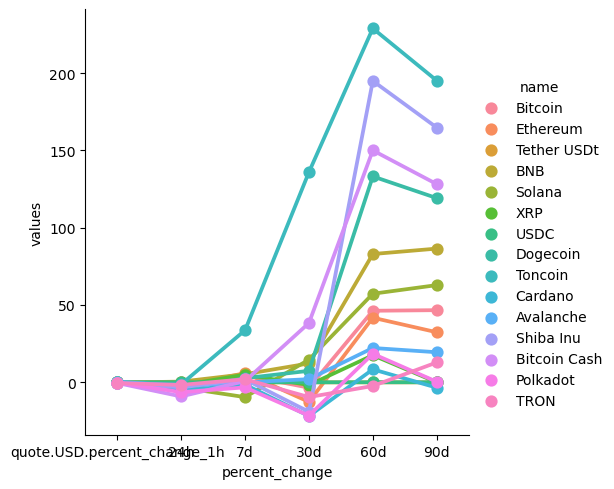

In [51]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')